In [1]:
import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

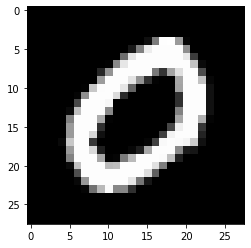

0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[2333], cmap='gray')
plt.show()
print(y_train[2333])

In [4]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Activation
model = Sequential()  #建立一个空的顺序模型
model.add(Dense(input_dim=28*28, output_dim=500))
# 顺序模型网络的第一层
# 在定义第一层时必须输入input_dim，即创建输入层，这样才能将数据喂进神经网络
# 该网络的输入层有28*28个节点，即将图片的像素点摊平成一维之后的长度
# output_dim表明有500个节点
model.add(Activation('sigmoid'))
# 定义（第一层隐藏层）节点的激活函数
# 激活函数还可以是softplus, softsign, relu, tanh, hard_sigmoid, linear
model.add(Dense(output_dim=500))
# 为顺序模型网络创建第二层隐藏层500个节点
# 上一层500个节点的输出自动连接到这500个节点
model.add(Activation('sigmoid'))
# 定义（第二层隐藏层）节点的激活函数
model.add(Dense(output_dim=10))
# 创建第三层（后续没有创建更多的网络层，所以这一层即是输出层）10个输出节点
# 上一层500个节点的输出自动连接到这10个节点
model.add(Activation('softmax'))
# 激活函数softmax可以将10个输出节点的输出值归一化为各自的概率
# 多类别分类问题时常常将输出层的激活函数设置为softmax, 设置为sigmoid等其实也能使用
model.compile(optimizer='adam', # 优化器选择adam，它同时获得了 AdaGrad 和 RMSProp 算法的优点
              loss='categorical_crossentropy',  # 损失函数选择交叉熵函数
              metrics=['accuracy']) # 性能评估函数类似与损失函数, 只不过该性能的评估结果将不会用于训练


D:\Application\Mini3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, units=500)`
  """
D:\Application\Mini3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=500)`
  del sys.path[0]
D:\Application\Mini3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`


In [5]:
import numpy as np
x_train = np.reshape(x_train, [60000, 784])
# 将训练集和测试集的二维数据展平成一维的，与神经网络的输入层对应
x_test = np.reshape(x_test, [10000, 784])
y_train = keras.utils.to_categorical(y_train,10)
# 将标签分别进行编码，与神经网络的输出层对应
# 例如将标签 0 映射为[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# 将标签 1 映射为[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_test = keras.utils.to_categorical(y_test,10)
history = model.fit(x_train, y_train, batch_size=100, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.3908 - acc: 0.8909

D:\Application\Mini3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


In [6]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

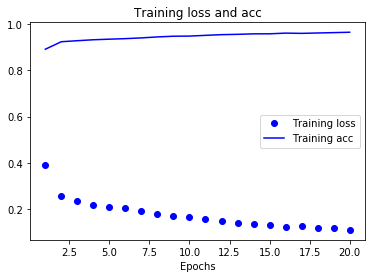

In [9]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
acc_values = history_dict['acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.title('Training loss and acc')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test)
# 评估方法是神经网络定义中的metrics=['accuracy']
score